# House Prices - Advanced Regression Techniques
*Predict sales prices and practice feature engineering, RFs, and gradient boosting*


## Data Fields

*   **SalePrice**: the property's sale price in dollars. This is the target variable that you're trying to predict.
*   **MSSubClass**: The building class
*   **MSZoning**: The general zoning classification
*   **LotFrontage**: Linear feet of street connected to property
*   **LotArea**: Lot size in square feet
*   **Street**: Type of road access
*   **Alley**: Type of alley access
*   **LotShape**: General shape of property
*   **LandContour**: Flatness of the property
*   **Utilities**: Type of utilities available
*   **LotConfig**: Lot configuration
*   **LandSlope**: Slope of property
*   **Neighborhood**: Physical locations within Ames city limits
*   **Condition1**: Proximity to main road or railroad
*   **Condition2**: Proximity to main road or railroad (if a second is present)
*   **BldgType**: Type of dwelling
*   **HouseStyle**: Style of dwelling
*   **OverallQual**: Overall material and finish quality
*   **OverallCond**: Overall condition rating
*   **YearBuilt**: Original construction date
*   **YearRemodAdd**: Remodel date
*   **RoofStyle**: Type of roof
*   **RoofMatl**: Roof material
*   **Exterior1st**: Exterior covering on house
*   **Exterior2nd**: Exterior covering on house (if more than one material)
*   **MasVnrType**: Masonry veneer type
*   **MasVnrArea**: Masonry veneer area in square feet
*   **ExterQual**: Exterior material quality
*   **ExterCond**: Present condition of the material on the exterior
*   **Foundation**: Type of foundation
*   **BsmtQual**: Height of the basement
*   **BsmtCond**: General condition of the basement
*   **BsmtExposure**: Walkout or garden level basement walls
*   **BsmtFinType1**: Quality of basement finished area
*   **BsmtFinSF1**: Type 1 finished square feet
*   **BsmtFinType2**: Quality of second finished area (if present)
*   **BsmtFinSF2**: Type 2 finished square feet
*   **BsmtUnfSF**: Unfinished square feet of basement area
*   **TotalBsmtSF**: Total square feet of basement area
*   **Heating**: Type of heating
*   **HeatingQC**: Heating quality and condition
*   **CentralAir**: Central air conditioning
*   **Electrical**: Electrical system
*   **1stFlrSF**: First Floor square feet
*   **2ndFlrSF**: Second floor square feet
*   **LowQualFinSF**: Low quality finished square feet (all floors)
*   **GrLivArea**: Above grade (ground) living area square feet
*   **BsmtFullBath**: Basement full bathrooms
*   **BsmtHalfBath**: Basement half bathrooms
*   **FullBath**: Full bathrooms above grade
*   **HalfBath**: Half baths above grade
*   **Bedroom**: Number of bedrooms above basement level
*   **Kitchen**: Number of kitchens
*   **KitchenQual**: Kitchen quality
*   **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
*   **Functional**: Home functionality rating
*   **Fireplaces**: Number of fireplaces
*   **FireplaceQu**: Fireplace quality
*   **GarageType**: Garage location
*   **GarageYrBlt**: Year garage was built
*   **GarageFinish**: Interior finish of the garage
*   **GarageCars**: Size of garage in car capacity
*   **GarageArea**: Size of garage in square feet
*   **GarageQual**: Garage quality
*   **GarageCond**: Garage condition
*   **PavedDrive**: Paved driveway
*   **WoodDeckSF**: Wood deck area in square feet
*   **OpenPorchSF**: Open porch area in square feet
*   **EnclosedPorch**: Enclosed porch area in square feet
*   **3SsnPorch**: Three season porch area in square feet
*   **ScreenPorch**: Screen porch area in square feet
*   **PoolArea**: Pool area in square feet
*   **PoolQC**: Pool quality
*   **Fence**: Fence quality
*   **MiscFeature**: Miscellaneous feature not covered in other categories
*   **MiscVal**: $Value of miscellaneous feature
*   **MoSold**: Month Sold
*   **YrSold**: Year Sold
*   **SaleType**: Type of sale
*   **SaleCondition**: Condition of sale

## Data-Processing

### Imports

In [104]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import scipy.stats as st
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### Load Datasets

In [105]:
train_data = pd.read_csv('https://raw.githubusercontent.com/keivanipchihagh/Kaggle-Competitions/main/House%20Prices%20-%20Advanced%20Regression%20Techniques/Datasets/Raw%20Datasets/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/keivanipchihagh/Kaggle-Competitions/main/House%20Prices%20-%20Advanced%20Regression%20Techniques/Datasets/Raw%20Datasets/test.csv')

train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

### Handle Missing Data

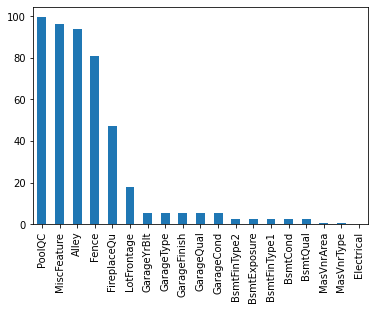

In [106]:
missing = train_data.isnull().sum() / train_data.shape[0] * 100
missing = missing[missing > 0]
missing.sort_values(inplace = True, ascending = False)
missing.plot.bar()

As shown above, the first 5 columns must be dropped due to numerous NULL entries

In [107]:
columns_to_drop = missing[:5].index
train_data.drop(columns = columns_to_drop, inplace = True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

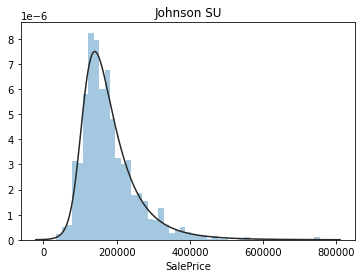

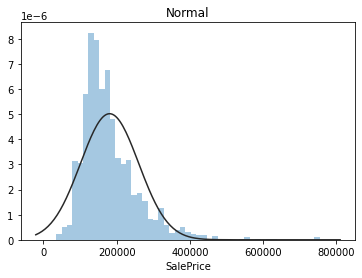

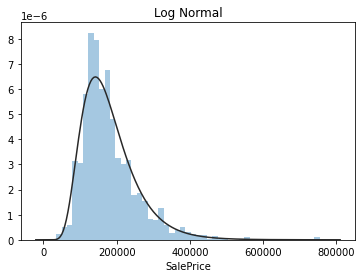

In [112]:
y = train_data['SalePrice']

plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde = False, fit = st.johnsonsu)

plt.figure(2); plt.title('Normal')
sns.distplot(y, kde = False, fit = st.norm)

plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde = False, fit = st.lognorm)